In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 
import pandas as pd
from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit

def monte_carlo_error(func, values, errors, n_samples=10000):
    samples = []
    for val, err in zip(values, errors):
        samples.append(np.random.normal(val, err, n_samples))
    
    results = func(*samples) 
    return np.mean(results), np.std(results)



c = 299792458

Slope: 13.933689299668627
Slope error 0.594619447974402


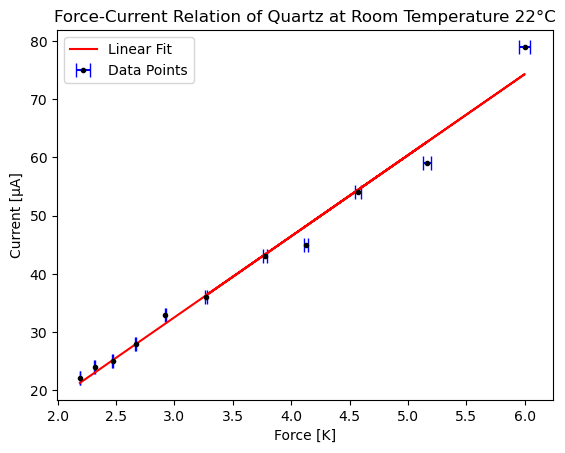

In [3]:
#Exercise 1

distance_arr = np.array([4,6,8,10,12,16,18,20,14,19,17]) #cm Error: 0.05 cm
ampere_arr = np.array([22,24,25,28,33,43,54,79,36,59,45]) #micro ampere Error: 1

def kraft_regel(x):
    return (50-x)/(25-x)


def charge(distance,current,gain):
    piezo = piezomod(distance,current,gain)
    force = kraft_regel(distance)
    return piezo*force


kraft_arr = kraft_regel(distance_arr)

c_coeff, cov = np.polyfit(kraft_arr,ampere_arr,1, cov = True)

def dist_to_amp(x): #AMPLIFICATION OF 
    return c_coeff[0]*x+c_coeff[1] 

force = np.zeros(len(distance_arr))
force_err = np.zeros(len(distance_arr))
dist_err1 = np.full(len(distance_arr),0.05)

for k in range(len(distance_arr)):
    force[k],force_err[k] = monte_carlo_error(kraft_regel, [distance_arr[k]], [dist_err1[k]], n_samples=10000)
        

plt.errorbar(kraft_arr,ampere_arr,xerr = force_err, fmt='.', capsize=5, ecolor = 'blue', color = 'black', label = 'Data Points')
plt.plot(kraft_arr, dist_to_amp(kraft_arr),color = 'red', label = 'Linear Fit')
plt.title('Force-Current Relation of Quartz at Room Temperature 22°C')
plt.xlabel('Force [K]')
plt.ylabel('Current [μA]')
plt.legend()
plt.savefig('quart_room.png')

slope = c_coeff[0]
errors = np.sqrt(np.diag(cov))

print('Slope:',slope)
print('Slope error',errors[0])

In [20]:
#Exercise 2
d_11 = 2.3*10**(-12) #
g = 200

gauge_constant_standard = 10**(-6) * slope / (d_11 * g) #ampere cm/(V N)

def cgstranf(x):
    return x/(c**2*10**11)

print('gauge constant:',gauge_constant_standard)
print('gauge constant CGS:',cgstranf(gauge_constant_standard))
print('gauge constant error:', errors[0] * 10**(-6)/ (d_11 * g))
print('gauge constant error CGS:', cgstranf(errors[0] * 10**(-6)/ (d_11 * g)))

gauge constant: 30290.628912323104
gauge constant CGS: 3.370286995719565e-24
gauge constant error: 1292.650973857396
gauge constant error CGS: 1.438268178520196e-25


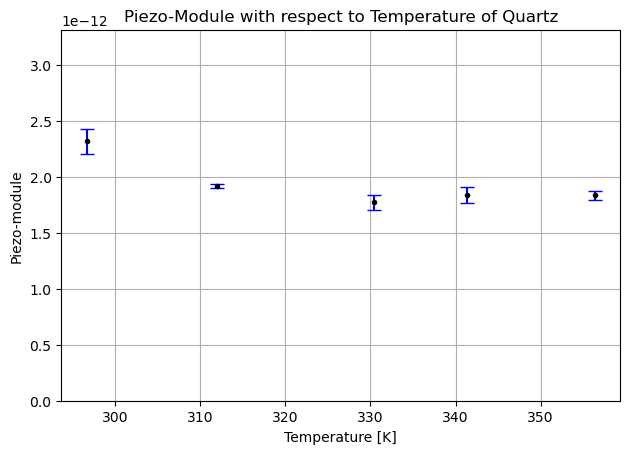

In [5]:
#Exercise 3

temperature3 = np.array([23.5,38.75,57.25,68.2,83.2])+273.15 # pm 2.5 K ?
distance_quartz = np.array([4,6,8,12,16,18,19,20]) #pm 0.5 cm
current_quartz = np.array([np.array([22,24,25,33,43,54,59,79]),np.array([20,21,23,28,38,48,54,64]),np.array([19,20,22,27,36,44,54,58]),np.array([18,19,22,26,37,46,48,62]),np.array([18,20,22,27,35,45,53,60])])*10**(-6) #pm 1 micro ampere

def piezomod(distance,current,gain, error_anal = False):
    curr_arr = np.zeros(len(current))
    curr_arr_err = np.zeros(len(current))

    for i in range(len(current)):
        c, covariance = np.polyfit(kraft_regel(distance),current[i],1, cov = True)
        curr_arr[i] = c[0]/(gauge_constant_standard*gain)
        curr_arr_err[i] = np.sqrt(np.diag(covariance))[0]/(gauge_constant_standard*gain)

    if error_anal == True:
        return curr_arr, curr_arr_err
    return curr_arr

#amp_err = np.full(len(distance_quartz),1e-6)
#dist_err = np.full(len(distance_quartz),0.05)
#result = np.zeros(len(distance_quartz))
#result_err = np.zeros(len(distance_quartz))

#for j in range(len(distance_quartz)):
#    monte3 = lambda x: piezomod(x,current_quartz[j],200)
#    print(distance_quartz[j],dist_err[j])
#    result[j],result_err[j] = monte_carlo_error(monte3, [distance_quartz[j]], [dist_err[j]], n_samples=10000)    

result_quartz, result_quartz_err = piezomod(distance_quartz,current_quartz,200,True)

plt.errorbar(temperature3,result_quartz,yerr = result_quartz_err, fmt='.', capsize=5, ecolor = 'blue', color = 'black', label = 'Data Points')
plt.ylim(0,np.max(result_quartz)+1e-12)
plt.title('Piezo-Module with respect to Temperature of Quartz')
plt.ylabel('Piezo-module')
plt.xlabel('Temperature [K]')
plt.grid()
plt.tight_layout()
plt.savefig('quartz.png')

Polarized Temprature (Avg.): [379.9  366.75 356.95 346.7  336.95 337.05 346.9  357.05 366.7  381.  ]
P. Temprature error: [0.75 0.6  0.6  1.25 1.1  0.9  1.05 0.4  0.55 0.15]
Polarize Piezo-M. [1.41438503e-11 1.56822503e-11 1.46857338e-11 1.44985515e-11
 1.25461167e-11 1.39393140e-11 1.43382755e-11 1.88101659e-11
 2.63992379e-11 7.99958721e-12]
P. Piezo_M error: [9.44209479e-13 6.49550505e-13 7.49393882e-13 2.85663713e-13
 7.60206960e-13 3.10247606e-13 9.92475039e-13 4.34398266e-13
 3.91265960e-13 6.24275962e-13]
Unpolarized Temprature (Avg.): [374.8  366.5  356.8  347.05 337.1  338.6  349.7  358.15 366.5  372.8 ]
P. Temprature error: [2.15 0.65 0.45 0.5  0.05 1.35 1.15 0.7  0.65 0.35]
Polarize Piezo-M. [2.43080522e-12 2.54029851e-12 2.65315527e-12 2.40403220e-12
 2.31523145e-12 2.56014574e-12 2.73152066e-12 3.17142397e-12
 3.59217927e-12 2.01748461e-12]
P. Piezo_M error: [5.74987821e-14 5.89516510e-14 4.69138384e-14 9.52165005e-14
 1.28686551e-13 2.90147327e-14 9.49420833e-14 1.4770848

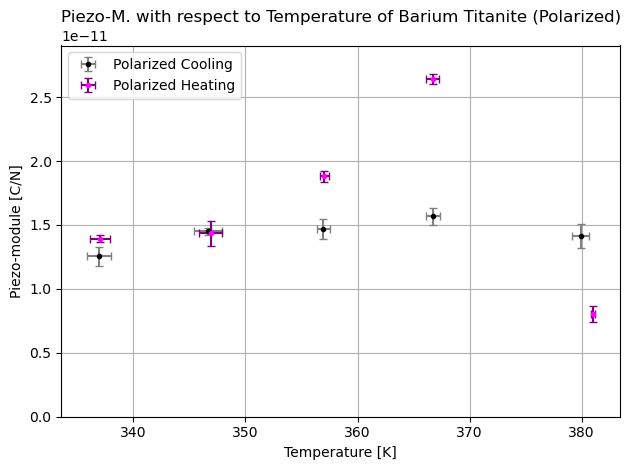

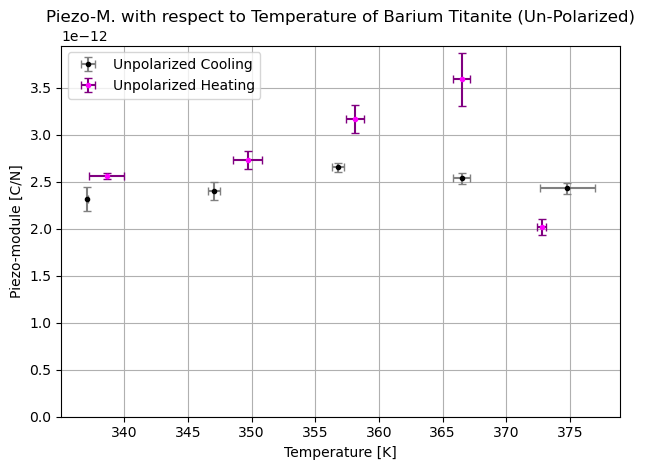

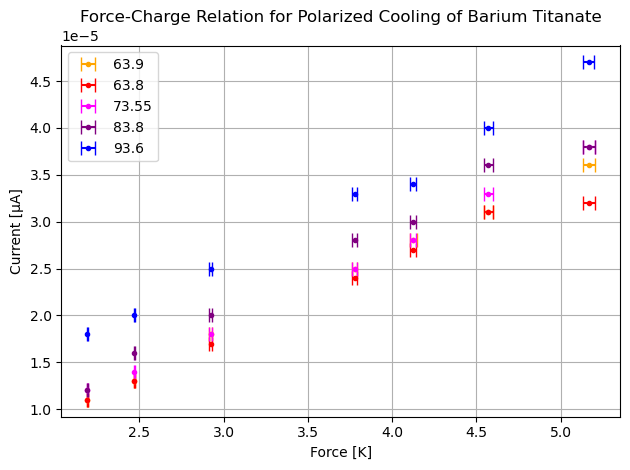

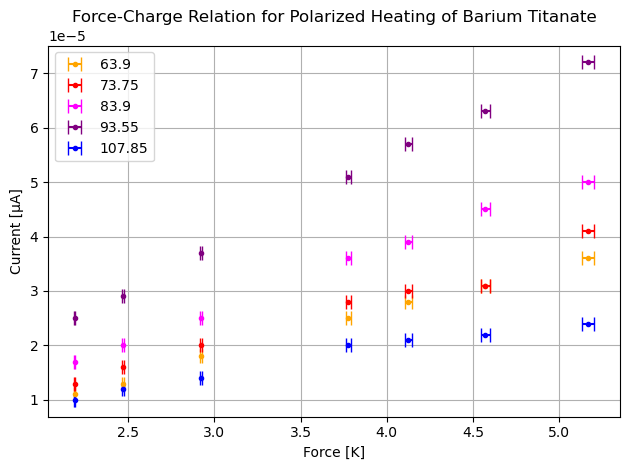

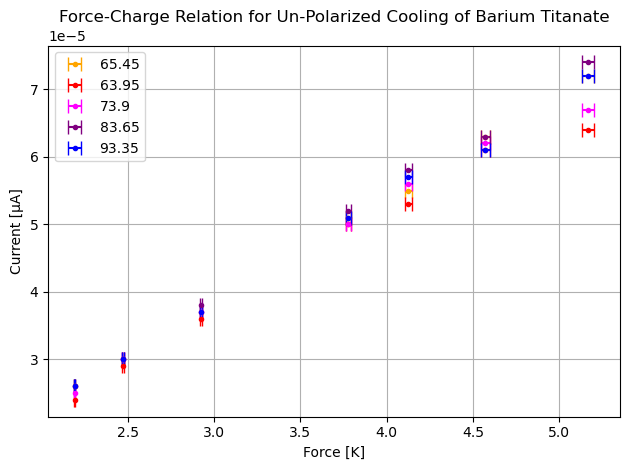

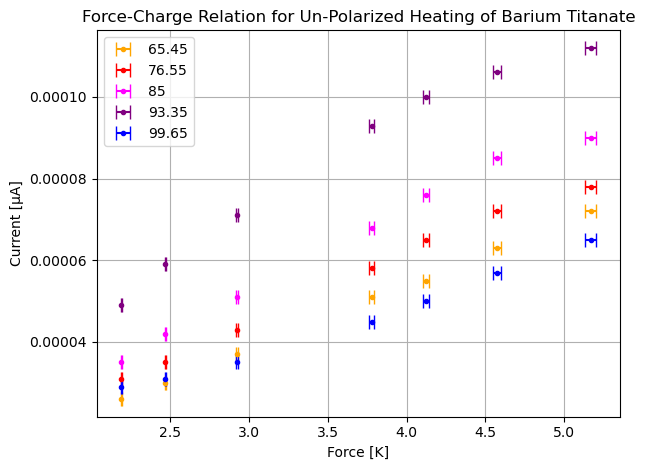

In [6]:
#Exercise 4.1 BARIUM
titles = ['Polarized Cooling','Polarized Heating','Un-Polarized Cooling','Un-Polarized Heating']
titles_file = ['polarized_cooling_charge','polarized_heating_charge','unpolarized_cooling_charge','unpolarized_heating_charge']


# Combined dataset
data_combined = [
    [107.5, 106],    # Dataset 1
    [94.2, 93.0],
    [84.4, 83.2],
    [74.8, 72.3],
    [64.9, 62.7],
    [63, 64.8],
    [72.7, 74.8],
    [83.5, 84.3],
    [93.0, 94.1],
    [107.7, 108],
    [103.8, 99.5],   # Dataset 2
    [94.0, 92.7],
    [84.1, 83.2],
    [74.4, 73.4],
    [64.0, 63.9],
    [64.1, 66.8],
    [75.4, 77.7],
    [84.3, 85.7],
    [92.7, 94],
    [100, 99.3]
]

def calculate_arrays(data):
    half_diff = []
    averages = []
    
    for row in data:
        val1, val2 = row
        half_diff.append(0.5 * abs(val1 - val2))
        averages.append((val1 + val2) / 2)
        
    
    return np.array(half_diff), np.array(averages)

# Calculate for combined dataset
temperature41_err, temperature41 = calculate_arrays(data_combined)

temperature41 += 273.15
temperature41_asth = np.array(["106.75", "93.6", "83.8", "73.55", "63.8", "63.9", "73.75", "83.9", "93.55", "107.85", "101.65",
                          "93.35", "83.65", "73.9", "63.95", "65.45", "76.55", "85", "93.35", "99.65"]) 
colors = ['orange','red','magenta','purple','blue']
distance_b = np.array([4,8,12,16,17,18,19]) #pm 0.05 m
#106.75
#np.array([46,57,68,84,92,99])
current_b = np.array([np.array([35,46,57,68,84,92,99]),np.array([18,20,25,33,34,40,47]),
                      np.array([12,16,20,28,30,36,38]),np.array([12,14,18,25,28,33,38]),
                      np.array([11,13,17,24,27,31,32]),np.array([11,13,18,25,28,31,36]),
                      np.array([13,16,20,28,30,31,41]),np.array([17,20,25,36,39,45,50]),
                      np.array([25,29,37,51,57,63,72]),np.array([10,12,14,20,21,22,24]),
                      np.array([20,24,32,42,48,56,64]),np.array([26,30,37,51,57,61,72]),
                      np.array([26,30,38,52,58,63,74]),np.array([25,30,37,50,56,62,67]),
                      np.array([24,29,36,50,53,61,64]),np.array([26,30,37,51,55,63,72]),
                      np.array([31,35,43,58,65,72,78]),np.array([35,42,51,68,76,85,90]),
                      np.array([49,59,71,93,100,106,112]),np.array([29,31,35,45,50,57,65])])*10**(-6) #pm 1 micro ampere
#NOTE FIRST MEASUREMENT IN 50 GAIN


amp_err = np.full(7,1e-6)
dist_err = np.full(7,0.05)

result_b = np.zeros(len(temperature41))
result_b_err = np.zeros(len(temperature41))

#result_b_monte = np.zeros(len(temperature41))
#err_b_monte = np.zeros(len(temperature41))
#for i in range(len(result_b_monte)):
#    result_b_monte[i], err_b_monte[i] = 

for j in range(len(temperature41)):
    if j == 0:
        result_b[j] = piezomod(distance_b,current_b,50, True)[0][j]
        result_b_err[j] = piezomod(distance_b,current_b,50, True)[1][j]
    else:
        result_b[j] = piezomod(distance_b,current_b,20, True)[0][j]
        result_b_err[j] = piezomod(distance_b,current_b,20, True)[1][j]
    if j >= 10:
        result_b[j] = piezomod(distance_b,current_b,200, True)[0][j]
        result_b_err[j] = piezomod(distance_b,current_b,200, True)[1][j]
    if j == len(temperature41):
        result_b[j] = piezomod(distance_b,current_b,100, True)[0][j]
        result_b_err[j] = piezomod(distance_b,current_b,100, True)[1][j]



plt.figure()
plt.errorbar(temperature41[:5],result_b[:5],color = 'black', label = 'Polarized Cooling', yerr = result_b_err[:5], xerr = temperature41_err[:5], fmt='.', capsize=3, ecolor = 'grey')
plt.errorbar(temperature41[5:10],result_b[5:10],color = 'magenta', label = 'Polarized Heating', yerr = result_b_err[5:10], xerr = temperature41_err[5:10], fmt='.', capsize=3, ecolor = 'purple')
plt.ylim(0,np.max(result_b)+np.max(result_b)/10)
plt.title('Piezo-M. with respect to Temperature of Barium Titanite (Polarized)')
plt.ylabel('Piezo-module [C/N]')
plt.xlabel('Temperature [K]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('polarized_piezo_mod.png')

plt.figure()
plt.errorbar(temperature41[10:15],result_b[10:15],color = 'black', label = 'Unpolarized Cooling', yerr = result_b_err[10:15], xerr = temperature41_err[10:15], fmt='.', capsize=3, ecolor = 'grey')
plt.errorbar(temperature41[15:],result_b[15:],color = 'magenta', label = 'Unpolarized Heating', yerr = result_b_err[15:], xerr = temperature41_err[15:], fmt='.', capsize=3, ecolor = 'purple')
plt.ylim(0,np.max(result_b[10:])+np.max(result_b[10:])/10)
plt.title('Piezo-M. with respect to Temperature of Barium Titanite (Un-Polarized)')
plt.ylabel('Piezo-module [C/N]')
plt.xlabel('Temperature [K]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('unpolarized_piezo_mod.png')

print('Polarized Temprature (Avg.):',temperature41[:10])
print('P. Temprature error:',temperature41_err[:10])
print('Polarize Piezo-M.', result_b[:10])
print('P. Piezo_M error:',result_b_err[:10])


print('Unpolarized Temprature (Avg.):',temperature41[10:])
print('P. Temprature error:',temperature41_err[10:])
print('Polarize Piezo-M.', result_b[10:])
print('P. Piezo_M error:',result_b_err[10:])

#Coefficients Finder

for i in range(4):
    plt.figure()
    plt.grid()
    plt.title('Force-Charge Relation for '+titles[i]+' of Barium Titanate' )
    plt.xlabel('Force [K]')
    plt.ylabel('Current [μA]')
    for j in range(5):
        force_b_alt = kraft_regel(distance_b)
        force_b = np.zeros(7)
        force_b_err = np.zeros(7)
        for k in range(len(distance_b)):
            force_b[k],force_b_err[k] = monte_carlo_error(kraft_regel, [distance_b[k]], [dist_err[k]], n_samples=10000)

        if i % 2 == 0: 
            plt.errorbar(force_b,current_b[5+i*5-j],xerr = force_b_err, fmt='.', capsize=5,label = temperature41_asth[5+i*5-j], color = colors[j])
        else:
            plt.errorbar(force_b,current_b[i*5+j],xerr = force_b_err, fmt='.', capsize=5,label = temperature41_asth[i*5+j], color = colors[j])
        #plt.errorbar(force_b_alt,current_b[i*5+j],yerr = amp_err, fmt='.', capsize=5,label = temperature41_asth[i*5+j], color = colors[j])
    plt.legend()
    plt.tight_layout()
    plt.savefig(titles_file[i]+'.png')


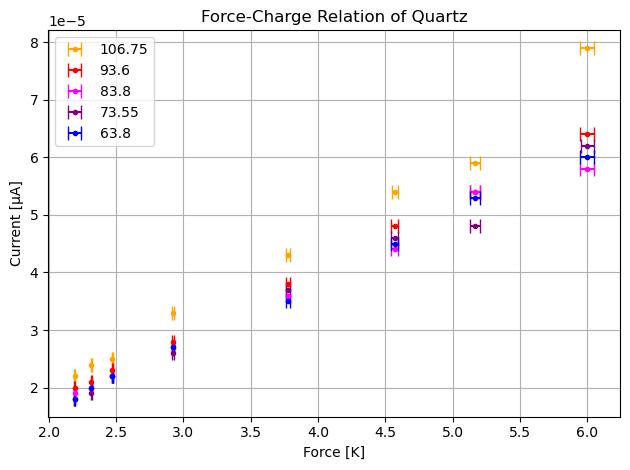

In [26]:

temperature3 = np.array([23.5,38.75,57.25,68.2,83.2])+273.15 # pm 2.5 K ?
distance_quartz = np.array([4,6,8,12,16,18,19,20]) #pm 0.5 cm
current_quartz = np.array([np.array([22,24,25,33,43,54,59,79]),np.array([20,21,23,28,38,48,54,64]),np.array([19,20,22,27,36,44,54,58]),np.array([18,19,22,26,37,46,48,62]),np.array([18,20,22,27,35,45,53,60])])*10**(-6) #pm 1 micro ampere


amp_err = np.full(len(distance_quartz),1e-6)
dist_err = np.full(len(distance_quartz),0.05)

plt.figure()
plt.grid()
plt.title('Force-Charge Relation of Quartz' )
plt.xlabel('Force [K]')
plt.ylabel('Current [μA]')
for j in range(5):
    force_b_alt = kraft_regel(distance_quartz)
    force_b = np.zeros(len(distance_quartz))
    force_b_err = np.zeros(len(distance_quartz))
    for k in range(len(distance_quartz)):
        force_b[k],force_b_err[k] = monte_carlo_error(kraft_regel, [distance_quartz[k]], [dist_err[k]], n_samples=10000)
    plt.errorbar(force_b,current_quartz[j],xerr = force_b_err, fmt='.', capsize=5,label = temperature41_asth[j], color = colors[j])
        #plt.errorbar(force_b_alt,current_b[i*5+j],yerr = amp_err, fmt='.', capsize=5,label = temperature41_asth[i*5+j], color = colors[j])
plt.legend()
plt.tight_layout()
plt.savefig('forcequartz.png')
